In [1]:
import os
os.chdir(r'E:\PGP-DSBA\Predictive model')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# LINEAR REGRESSION

## 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [3]:
firm_data = pd.read_csv('Firm_level_data.csv', index_col= 0)

In [4]:
firm_data.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [5]:
firm_data.shape

(759, 9)

In [6]:
firm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 59.3+ KB


In [7]:
firm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


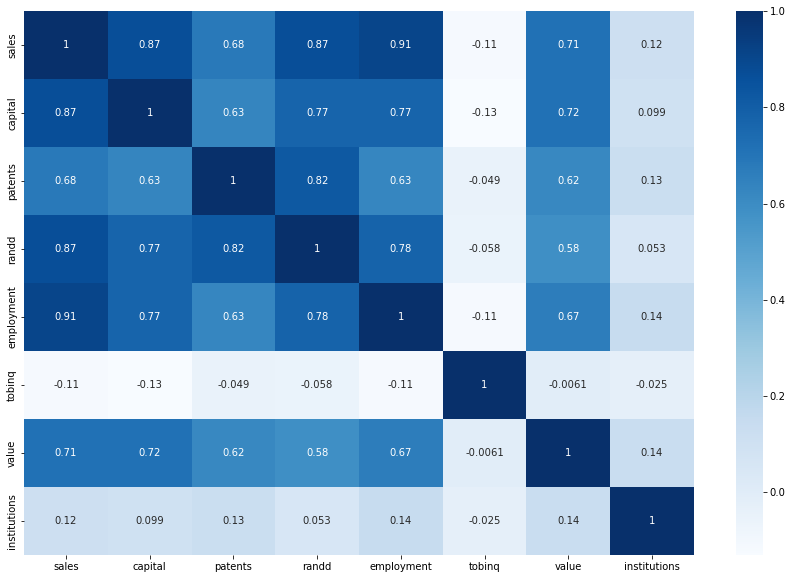

In [8]:
corr = firm_data.corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr, annot= True, cmap= 'Blues');

<Figure size 1440x720 with 0 Axes>

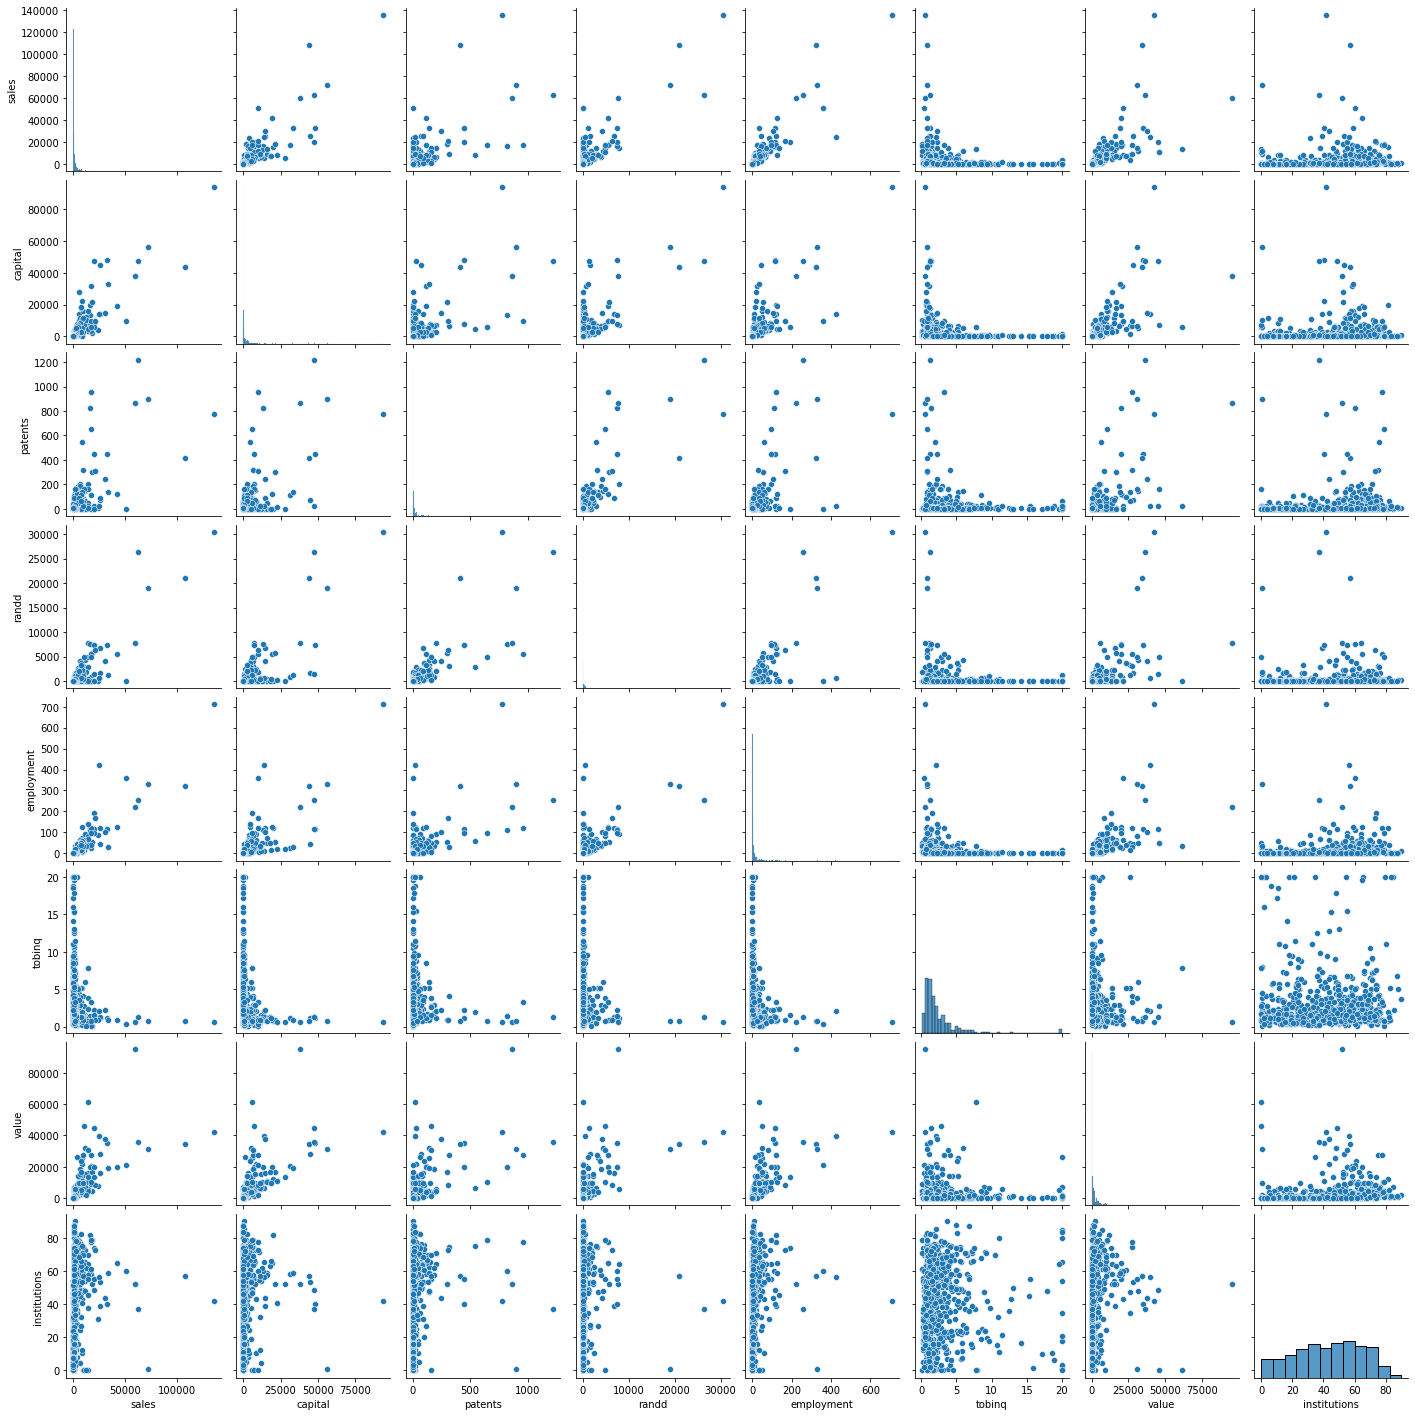

In [9]:
plt.figure(figsize= (20,10))
sns.pairplot(firm_data);

### Univariate Analysis

In [10]:
def univariate_analysis_numeric(column):
    plt.figure(figsize=(10,7))
    print('Distribution of '+ column)
    sns.boxplot(firm_data[column])
    plt.show()

In [11]:
firm_data.dtypes

sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [12]:
firm_numeric = firm_data.drop('sp500', axis =1)
firm_numeric.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46


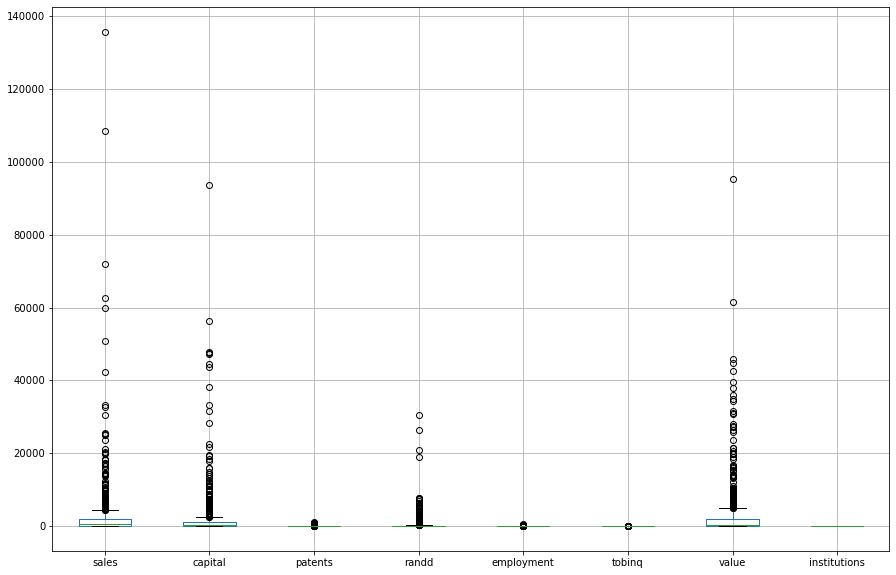

In [13]:
plt.figure(figsize=(15,10))
firm_numeric.boxplot();

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in firm_numeric.columns:
    lr,ur=remove_outlier(firm_numeric[column])
    firm_numeric[column]=np.where(firm_numeric[column]>ur,ur,firm_numeric[column])
    firm_numeric[column]=np.where(firm_numeric[column]<lr,lr,firm_numeric[column])

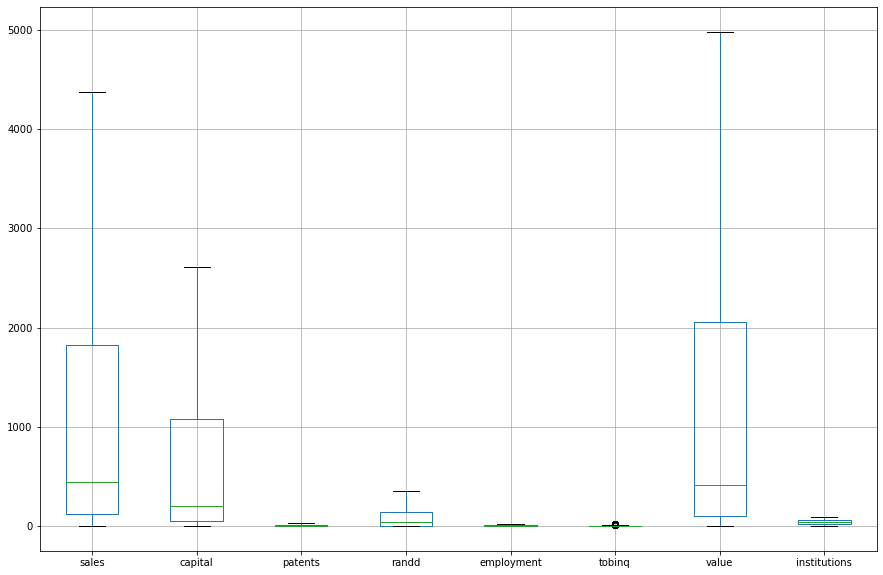

In [16]:
plt.figure(figsize=(15,10))
firm_numeric.boxplot();

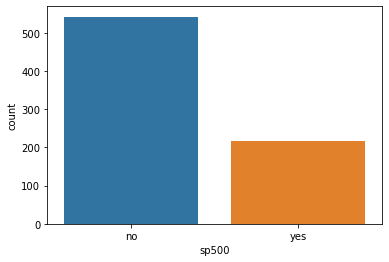

In [17]:
sns.countplot(data= firm_data, x= 'sp500');

## Bivariate Analysis

In [18]:
firm_data.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

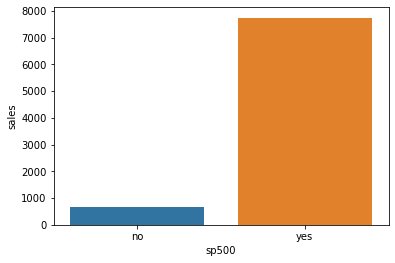

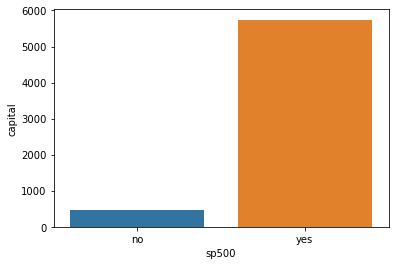

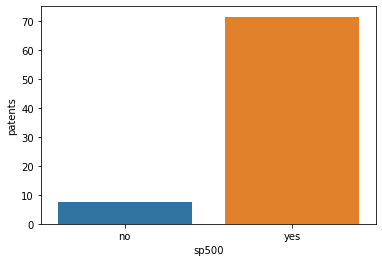

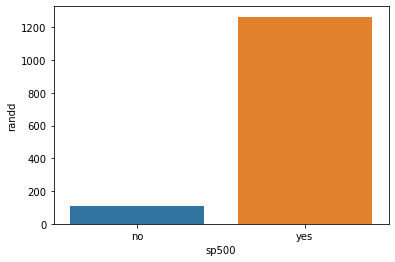

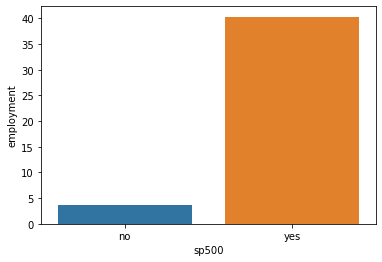

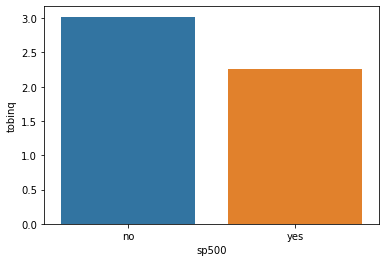

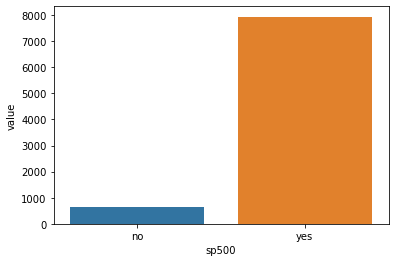

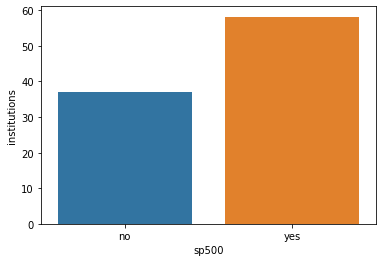

In [19]:
for col in firm_numeric.columns:
    sns.barplot(data=firm_numeric, x= firm_data['sp500'], y= firm_data[col], ci= False)
    plt.show()

## 1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)

In [20]:
firm_data.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [21]:
firm_data['tobinq'] = firm_data['tobinq'].fillna(firm_data['tobinq'].median())

In [22]:
firm_data.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

## 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

In [23]:
firm_data['sp500'].value_counts()

no     542
yes    217
Name: sp500, dtype: int64

In [24]:
firm_data['sp500'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
firm_data['sp500']= firm_data['sp500'].astype('category')

In [26]:
firm_data.dtypes

sales            float64
capital          float64
patents            int64
randd            float64
employment       float64
sp500           category
tobinq           float64
value            float64
institutions     float64
dtype: object

In [27]:
firm_data['sp500']= firm_data['sp500'].cat.codes

In [28]:
firm_data.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0,1.063300,67.406408,49.46


In [29]:
from sklearn.model_selection import train_test_split

X = firm_data.drop('sales', axis = 1)
y= firm_data.pop('sales')

In [30]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [106]:
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [113]:
lr.score(X_train, y_train_pred_lr)

1.0

In [119]:
lr.score(X_test, y_test_pred_lr)

1.0

In [115]:
print('The coefficient of determination R^2 of the prediction on Train set',lr.score(X_train, y_train_pred_lr))

The coefficient of determination R^2 of the prediction on Train set 1.0


In [116]:
print('The coefficient of determination R^2 of the prediction on Test set',lr.score(X_test, y_test_pred_lr))

The coefficient of determination R^2 of the prediction on Test set 1.0


In [117]:
from sklearn.metrics import mean_squared_error
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 19726391557.63931


In [120]:
print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(mean_squared_error(y_train,lr.predict(X_train))))

The Root Mean Square Error (RMSE) of the model is for training set is 0.09519768377842565


# Logistic Regression and Linear Discriminant Analysis

## 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [37]:
cars = pd.read_csv('Car_Crash.csv', index_col=0)

In [38]:
cars.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [39]:
cars.shape

(11217, 15)

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.4+ MB


In [41]:
cars.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [42]:
cars.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [43]:
cars['injSeverity'].fillna(cars['injSeverity'].mode()[0], inplace= True)

In [44]:
cars.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [45]:
for col in cars.columns:
    if cars[col].dtype == 'object':
        print(col)
        print(cars[col].value_counts(normalize= True))
        print('\n')

dvcat
10-24      0.482660
25-39      0.300259
40-54      0.119818
55+        0.072123
1-9km/h    0.025140
Name: dvcat, dtype: float64


Survived
survived        0.894803
Not_Survived    0.105197
Name: Survived, dtype: float64


airbag
airbag    0.629758
none      0.370242
Name: airbag, dtype: float64


seatbelt
belted    0.699741
none      0.300259
Name: seatbelt, dtype: float64


sex
m    0.539182
f    0.460818
Name: sex, dtype: float64


abcat
deploy      0.389141
unavail     0.370242
nodeploy    0.240617
Name: abcat, dtype: float64


occRole
driver    0.783275
pass      0.216725
Name: occRole, dtype: float64


caseid
73:100:2    0.000624
78:2:1      0.000535
73:110:1    0.000535
49:156:1    0.000535
74:74:2     0.000535
              ...   
74:186:1    0.000089
74:185:2    0.000089
74:183:1    0.000089
74:180:2    0.000089
2:95:1      0.000089
Name: caseid, Length: 6488, dtype: float64




In [46]:
cars = cars.drop('caseid', axis = 1)

In [47]:
cars['dvcat'] = cars['dvcat'].replace({'1-9km/h' : '1', '10-24' : '2', '25-39' : '3', '40-54' : '4', '55+' : '5'})

In [48]:
cars['Survived'] = cars['Survived'].replace({'survived' : '1', 'Not_Survived' : '0'})

In [49]:
cars['airbag'] = cars['airbag'].replace({'airbag' : '1', 'none': '0'})

In [50]:
cars['seatbelt'] = cars['seatbelt'].replace({'belted': '1', 'none': '0'})

In [51]:
cars['sex'] = cars['sex'].replace({'m': '1', 'f': '2'})

In [52]:
cars['abcat'] = cars['abcat'].replace({'deploy': '1', 'nodeploy': '2', 'unavail': '3'})

In [53]:
cars['occRole']= cars['occRole'].replace({'driver' : '1', 'pass': '2'})

In [54]:
for col in cars.columns:
    if cars[col].dtype == 'object':
        cars[col] = cars[col].astype('category')
        print(col)
        print(cars[col].value_counts(normalize= True))
        print('\n')

dvcat
2    0.482660
3    0.300259
4    0.119818
5    0.072123
1    0.025140
Name: dvcat, dtype: float64


Survived
1    0.894803
0    0.105197
Name: Survived, dtype: float64


airbag
1    0.629758
0    0.370242
Name: airbag, dtype: float64


seatbelt
1    0.699741
0    0.300259
Name: seatbelt, dtype: float64


sex
1    0.539182
2    0.460818
Name: sex, dtype: float64


abcat
1    0.389141
3    0.370242
2    0.240617
Name: abcat, dtype: float64


occRole
1    0.783275
2    0.216725
Name: occRole, dtype: float64




In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   dvcat        11217 non-null  category
 1   weight       11217 non-null  float64 
 2   Survived     11217 non-null  category
 3   airbag       11217 non-null  category
 4   seatbelt     11217 non-null  category
 5   frontal      11217 non-null  int64   
 6   sex          11217 non-null  category
 7   ageOFocc     11217 non-null  int64   
 8   yearacc      11217 non-null  int64   
 9   yearVeh      11217 non-null  float64 
 10  abcat        11217 non-null  category
 11  occRole      11217 non-null  category
 12  deploy       11217 non-null  int64   
 13  injSeverity  11217 non-null  float64 
dtypes: category(7), float64(3), int64(4)
memory usage: 778.7 KB


In [56]:
cars['frontal'] = cars['frontal'].astype('category')
cars['injSeverity'] = cars['injSeverity'].astype('category')
cars['deploy'] = cars['deploy'].astype('category')

In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   dvcat        11217 non-null  category
 1   weight       11217 non-null  float64 
 2   Survived     11217 non-null  category
 3   airbag       11217 non-null  category
 4   seatbelt     11217 non-null  category
 5   frontal      11217 non-null  category
 6   sex          11217 non-null  category
 7   ageOFocc     11217 non-null  int64   
 8   yearacc      11217 non-null  int64   
 9   yearVeh      11217 non-null  float64 
 10  abcat        11217 non-null  category
 11  occRole      11217 non-null  category
 12  deploy       11217 non-null  category
 13  injSeverity  11217 non-null  category
dtypes: category(10), float64(2), int64(2)
memory usage: 549.1 KB


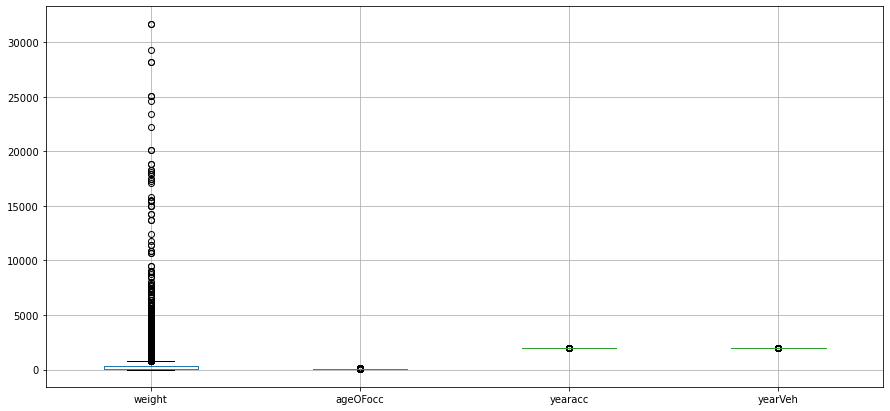

In [58]:
plt.figure(figsize= (15,7))
cars.boxplot();

In [59]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr_bound = Q1 - (1.5 * IQR)
    ur_bound = Q3 + (1.5 * IQR)
    return lr_bound, ur_bound


In [60]:
columns = cars[['weight', 'ageOFocc', 'yearacc', 'yearVeh']]
for col in columns:
    lr_bound, ur_bound = remove_outlier(cars[col])
    cars[col] = np.where(cars[col]< lr_bound, lr_bound, cars[col])
    cars[col] = np.where(cars[col] > ur_bound, ur_bound, cars[col])

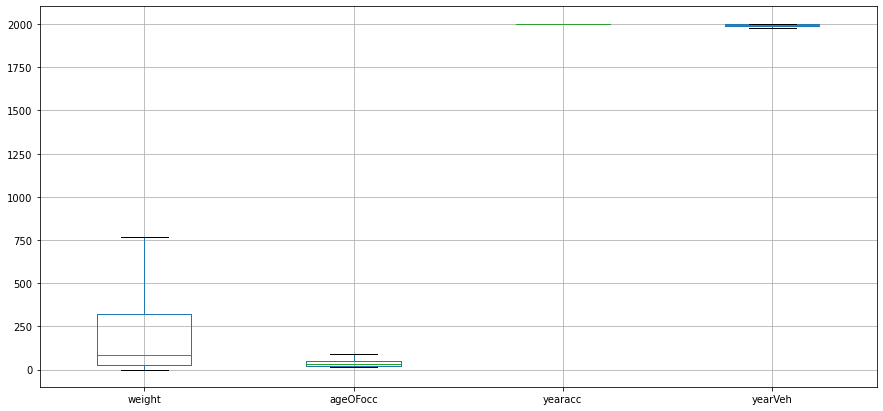

In [61]:
plt.figure(figsize= (15,7))
cars.boxplot();

In [62]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,219.454706,261.963636,0.0,28.292,82.195,324.056,767.702
ageOFocc,11217.0,37.408220,18.136557,16.0,22.000,33.000,48.000,87.000
yearacc,11217.0,2001.188553,0.816681,1999.5,2001.000,2001.000,2002.000,2002.000
yearVeh,11217.0,1994.247303,5.405095,1979.0,1991.000,1995.000,1999.000,2003.000


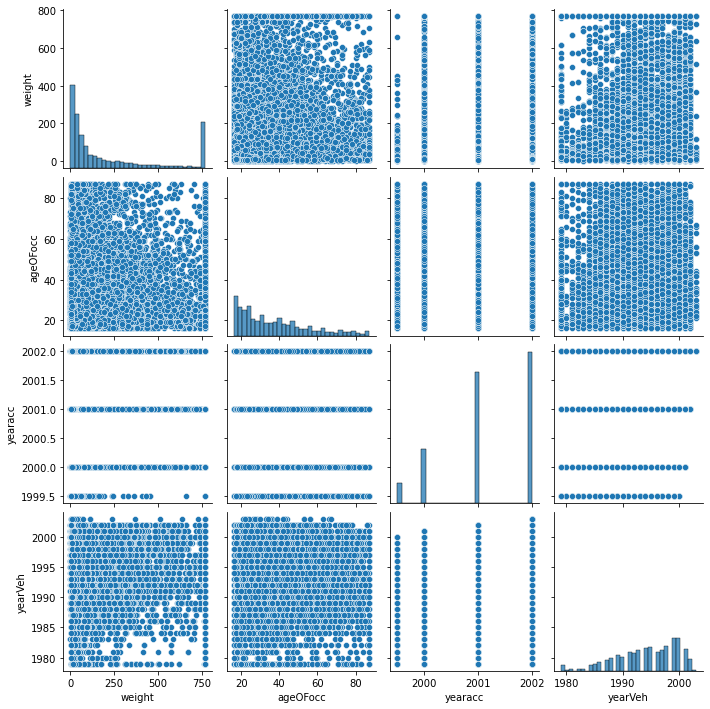

In [63]:
sns.pairplot(cars);

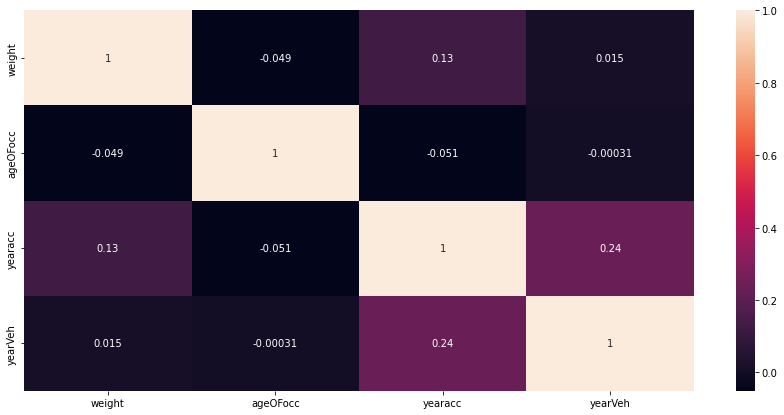

In [64]:
corr_cars = cars.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_cars, annot=True);

### Univariate Analysis

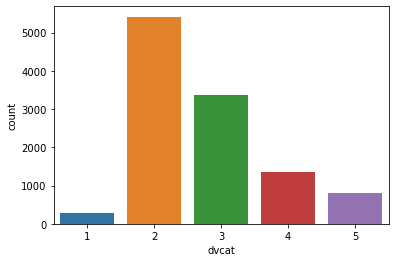

In [65]:
sns.countplot(cars['dvcat']);

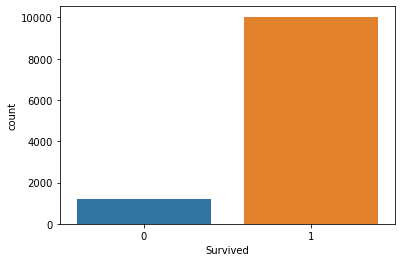

In [66]:
sns.countplot(cars['Survived']);

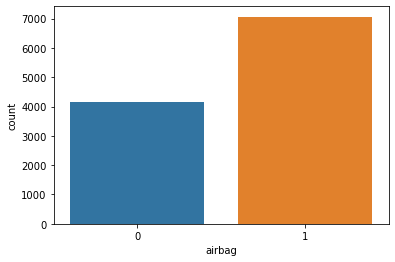

In [67]:
sns.countplot(cars['airbag']);

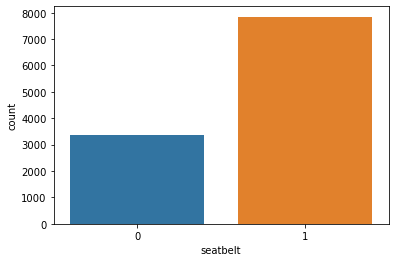

In [68]:
sns.countplot(cars['seatbelt']);

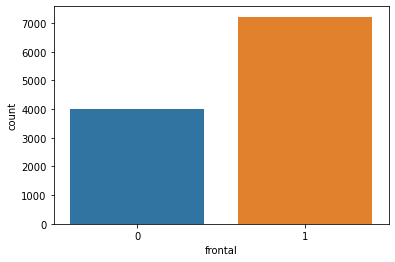

In [69]:
sns.countplot(cars['frontal']);

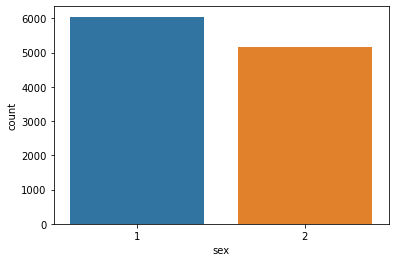

In [70]:
sns.countplot(cars['sex']);

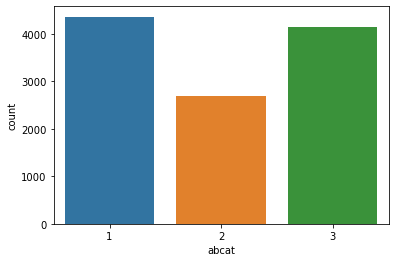

In [71]:
sns.countplot(cars['abcat']);

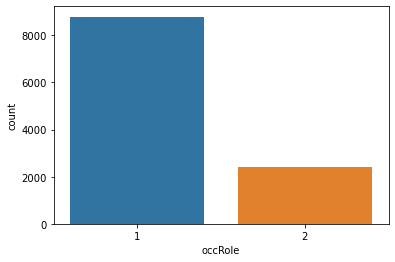

In [72]:
sns.countplot(cars['occRole']);

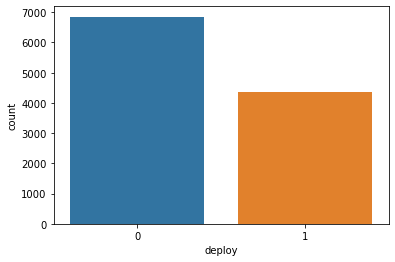

In [73]:
sns.countplot(cars['deploy']);

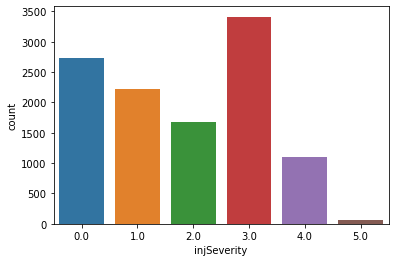

In [74]:
sns.countplot(cars['injSeverity']);

## 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [75]:
cars_dummy = pd.get_dummies(cars, drop_first=True)
cars_dummy.head(10)

,weight,ageOFocc,yearacc,yearVeh,dvcat_2,dvcat_3,dvcat_4,dvcat_5,Survived_1,airbag_1,...,sex_2,abcat_2,abcat_3,occRole_2,deploy_1,injSeverity_1.0,injSeverity_2.0,injSeverity_3.0,injSeverity_4.0,injSeverity_5.0
0,27.078,32.0,1999.5,1987.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,89.627,54.0,1999.5,1994.0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,27.078,67.0,1999.5,1992.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,27.078,64.0,1999.5,1992.0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
4,13.374,23.0,1999.5,1986.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,12.383,77.0,1999.5,1992.0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
6,13.374,34.0,1999.5,1990.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7,13.374,37.0,1999.5,1995.0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8,13.374,33.0,1999.5,1987.0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
9,15.355,84.0,1999.5,1996.0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [76]:
cars_dummy.columns

Index(['weight', 'ageOFocc', 'yearacc', 'yearVeh', 'dvcat_2', 'dvcat_3',
       'dvcat_4', 'dvcat_5', 'Survived_1', 'airbag_1', 'seatbelt_1',
       'frontal_1', 'sex_2', 'abcat_2', 'abcat_3', 'occRole_2', 'deploy_1',
       'injSeverity_1.0', 'injSeverity_2.0', 'injSeverity_3.0',
       'injSeverity_4.0', 'injSeverity_5.0'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split

X = cars_dummy.drop('Survived_1', axis= 1)
y = cars_dummy['Survived_1']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2, stratify= cars_dummy['Survived_1'])

In [79]:
y_train.value_counts(normalize= True)

1    0.89479
0    0.10521
Name: Survived_1, dtype: float64

In [80]:
y_test.value_counts(normalize= True)

1    0.894831
0    0.105169
Name: Survived_1, dtype: float64

### Logistic Regression model

In [81]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='newton-cg', max_iter=10000, n_jobs=2, verbose=True, penalty='none')
log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Linear Discriminant Analysis

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [83]:
y_train_pred = lda_clf.predict(X_train)
y_test_pred = lda_clf.predict(X_test)

In [84]:
y_test_pred_prob_lda = lda_clf.predict_proba(X_test)
pd.DataFrame(y_test_pred_prob_lda).head(10)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


## 2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized.

#### Logistic Regression

In [85]:
y_train_pred_log= log.predict(X_train)
y_test_pred_log = log.predict(X_test)

In [86]:
y_train_pred_prob = log.predict_proba(X_train)
pd.DataFrame(y_train_pred_prob).head(10)

,0,1
0,0.000000,1.000000
1,0.053259,0.946741
2,0.005230,0.994770
3,0.000000,1.000000
4,0.001159,0.998841
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.001168,0.998832


In [87]:
y_test_pred_prob = log.predict_proba(X_test)
pd.DataFrame(y_test_pred_prob).head(10)

,0,1
0,0.000416,0.999584
1,0.000120,0.999880
2,0.000125,0.999875
3,0.000000,1.000000
4,0.001652,0.998348
5,0.000000,1.000000
6,0.033568,0.966432
7,0.000000,1.000000
8,0.000173,0.999827
9,0.000024,0.999976


##### Accuracy

In [88]:
#training data
log.score(X_train, y_train)

0.9913386829703222

In [89]:
#test data
log.score(X_test, y_test)

0.9887106357694593

##### AUC & ROC

In [90]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, accuracy_score

AUC : 0.996


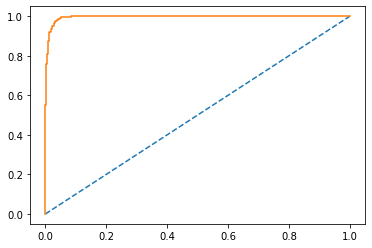

In [91]:
#train data

probs = log.predict_proba(X_train)

probs = probs[:,1]

auc = roc_auc_score(y_train, probs)

print('AUC : %.3f'%auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(train_fpr, train_tpr);

AUC : 0.996


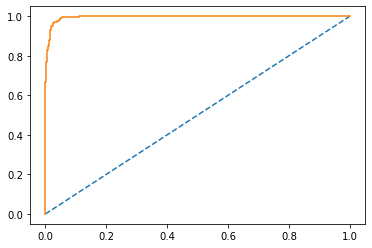

In [92]:
#test data

probs = log.predict_proba(X_test)

probs = probs[:,1]

auc = roc_auc_score(y_test, probs)

print('AUC : %.3f'%auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(test_fpr, test_tpr);

##### Confusion Matrix

In [93]:
# train data

cm_train_log = confusion_matrix(y_train, y_train_pred_log, labels=[0,1])

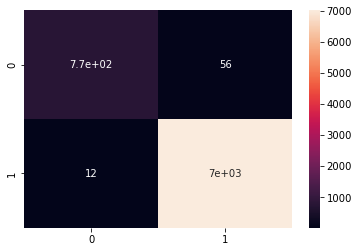

In [94]:
sns.heatmap(cm_train_log, annot= True);

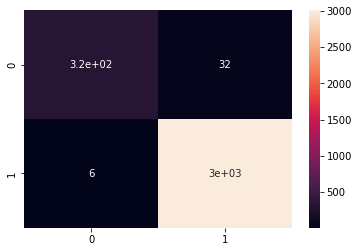

In [95]:
# test data

cm_test_log = confusion_matrix(y_test, y_test_pred_log, labels=[0,1])

sns.heatmap(cm_test_log, annot=True);

#### Linear Discriminant Analysis

In [96]:
y_train_pred_lda= lda_clf.predict(X_train)
y_test_pred_lda = lda_clf.predict(X_test)

In [97]:
y_train_pred_prob_lda = lda_clf.predict_proba(X_train)
pd.DataFrame(y_train_pred_prob_lda).head(10)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


##### Accuracy

In [98]:
#training data

lda_clf.score(X_train, y_train)

0.9904470768055025

In [99]:
#test data
lda_clf.score(X_test, y_test)

0.9887106357694593

#### Auc & Roc

AUC : 0.962


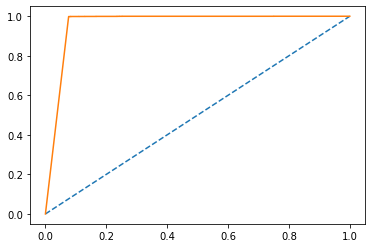

In [100]:
# train data

probs = lda_clf.predict_proba(X_train)

probs = probs[:,1]

auc = roc_auc_score(y_train, probs)

print('AUC : %.3f'%auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(train_fpr, train_tpr);

AUC : 0.953


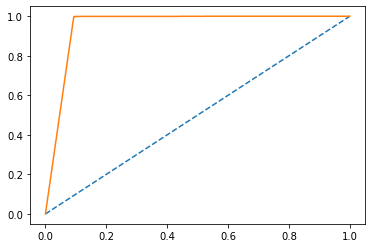

In [101]:
# test data

probs = lda_clf.predict_proba(X_test)

probs = probs[:,1]

auc = roc_auc_score(y_test, probs)

print('AUC : %.3f'%auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(test_fpr, test_tpr);

#### Confusion matrix

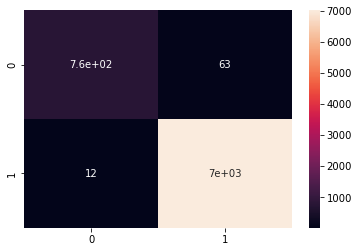

In [102]:
cm_train_lda = confusion_matrix(y_train, y_train_pred_lda, labels=[0,1])
sns.heatmap(cm_train_lda, annot= True);

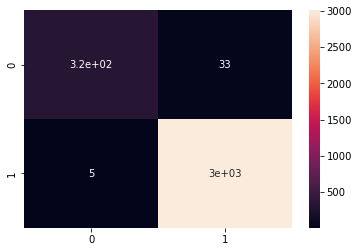

In [103]:
cm_test_lda = confusion_matrix(y_test, y_test_pred_lda, labels=[0,1])
sns.heatmap(cm_test_lda, annot= True);